In [12]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

The syntax of the command is incorrect.


'cp' is not recognized as an internal or external command,
operable program or batch file.


In [11]:
! kaggle datasets download -d kunalgupta2616/dog-vs-cat-images-data



'kaggle' is not recognized as an internal or external command,
operable program or batch file.


In [13]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

ModuleNotFoundError: No module named 'tensorflow'

In [4]:
import zipfile
import os

# Define the path to your zip file
zip_file_path = '/content/dog-vs-cat-images-data.zip' # Replace with the actual path to your zip file

# Define the directory where you want to extract the contents
extract_dir = '/content' # Replace with your desired extraction directory

# Create the extraction directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Open the zip file and extract its contents
try:
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)
    print(f"Zip file extracted successfully to {extract_dir}")
except FileNotFoundError:
    print(f"Error: The file {zip_file_path} was not found.")
except zipfile.BadZipFile:
    print(f"Error: The file {zip_file_path} is not a valid zip file.")
except Exception as e:
    print(f"An error occurred: {e}")

Zip file extracted successfully to /content


In [5]:
import os
import shutil

test_dir = "/content/dogcat/test1"

# Only allow 'cat' and 'dog' folders
allowed_classes = {'cat', 'dog'}

# Remove anything else
for item in os.listdir(test_dir):
    item_path = os.path.join(test_dir, item)
    if os.path.isdir(item_path) and item not in allowed_classes:
        print(f"Removing extra folder: {item}")
        shutil.rmtree(item_path)


Removing extra folder: test1


In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    '/content/dogcat/train',
    labels='inferred',
    label_mode='int',
    image_size=(256, 256),
    batch_size=32
)

validation_ds = tf.keras.utils.image_dataset_from_directory(
    '/content/dogcat/validation',
    labels='inferred',
    label_mode='int',
    image_size=(256, 256),
    batch_size=32
)


Found 25000 files belonging to 2 classes.
Found 8000 files belonging to 2 classes.


In [7]:
#normalize

def proccess( image,label):
  image =tf.cast(image/255. ,tf.float32)
  return image,label

train_ds=train_ds.map(proccess)
validation_ds=validation_ds.map(proccess)

In [8]:
#creating cnn model
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [11]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 97ms/step - accuracy: 0.6063 - loss: 1.7737 - val_accuracy: 0.7511 - val_loss: 0.5101
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 131s 93ms/step - accuracy: 0.7305 - loss: 0.5768 - val_accuracy: 0.7761 - val_loss: 0.4761
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 95ms/step - accuracy: 0.7952 - loss: 0.4628 - val_accuracy: 0.7935 - val_loss: 0.4405
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 94ms/step - accuracy: 0.8439 - loss: 0.3599 - val_accuracy: 0.8641 - val_loss: 0.3080
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 81ms/step - accuracy: 0.8857 - loss: 0.2738 - val_accuracy: 0.8372 - val_loss: 0.4524
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 63s 81ms/step - accuracy: 0.9254 - loss: 0.1835 - val_accuracy: 0.9133 - val_loss: 0.2253
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 63s 81ms/step - accuracy: 0.9582 - loss: 0.1106 - val_accuracy: 0.8539 - val_loss: 0.4797
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 81ms/step - accuracy: 0.9731 - loss: 0.0756 -

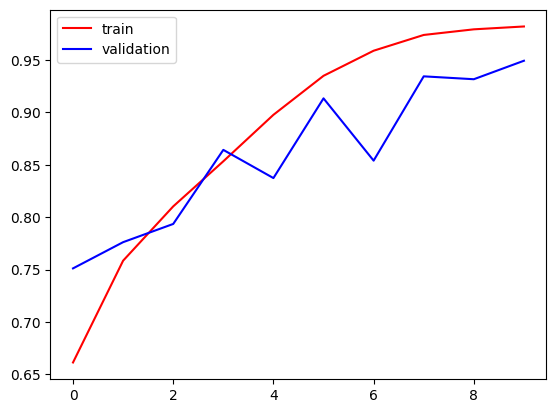

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [13]:
#ways tp reduce overfiting
#add more data
#data augmentation
#L1/L2 regulizaer
#drpout
#batch norm
#reduce complicity

In [24]:
import cv2

In [25]:
test_ig = cv2.imread('/content/dog.991.jpg')
test_ig1 = cv2.imread('/content/cat.9981.jpg')


In [16]:
test_cat1 = cv2.imread('/content/cat.18.jpg')
test_cat2 = cv2.imread('/content/cat.22.jpg')
test_cat3 = cv2.imread('/content/cat.54.jpg')
test_cat4 = cv2.imread('/content/cat.98.jpg')
test_cat5 = cv2.imread('/content/cat.43.jpg')

In [17]:
test_dog1 = cv2.imread('/content/dog.30.jpg')
test_dog2 = cv2.imread('/content/dog.38.jpg')
test_dog3 = cv2.imread('/content/dog.61.jpg')
test_dog4 = cv2.imread('/content/dog.75.jpg')
test_dog5 = cv2.imread('/content/dog.90.jpg')

TypeError: Image data of dtype object cannot be converted to float

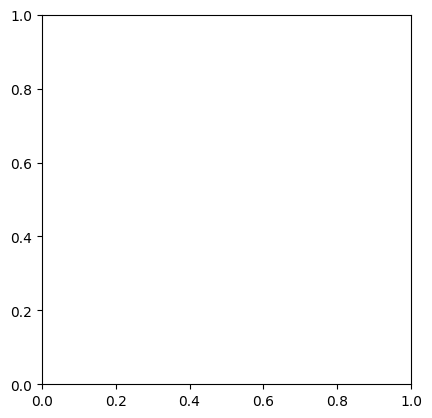

In [22]:
plt.imshow(test_ig)


TypeError: Image data of dtype object cannot be converted to float

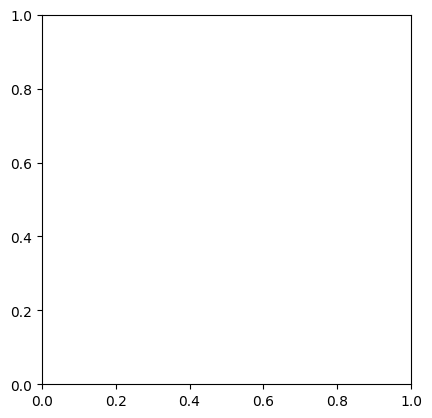

In [20]:
plt.imshow(test_ig1)

In [23]:
test_ig.shape


AttributeError: 'NoneType' object has no attribute 'shape'

In [28]:
test_ig1.shape

AttributeError: 'NoneType' object has no attribute 'shape'

In [27]:
test_ig = cv2.resize(test_ig,(256,256))
test_ig1 = cv2.resize(test_ig,(256,256))

error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [26]:
test_cat1 =cv2.resize(test_cat1,(256,256))
test_cat2 =cv2.resize(test_cat2,(256,256))
test_cat3 =cv2.resize(test_cat3,(256,256))
test_cat4 =cv2.resize(test_cat4,(256,256))
test_cat5 =cv2.resize(test_cat5,(256,256))

error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [ ]:
test_dog1 =cv2.resize(test_dog1,(256,256))
test_dog2 =cv2.resize(test_dog2,(256,256))
test_dog3 =cv2.resize(test_dog3,(256,256))
test_dog4 =cv2.resize(test_dog4,(256,256))
test_dog5 =cv2.resize(test_dog5,(256,256))

In [ ]:
test_ip = test_ig.reshape((1,256,256,3))
test_ip1 = test_ig1.reshape((1,256,256,3))

In [ ]:
test_ip_cat1 = test_cat1.reshape((1,256,256,3))
test_ip_cat2 = test_cat2.reshape((1,256,256,3))
test_ip_cat3 = test_cat3.reshape((1,256,256,3))
test_ip_cat4 = test_cat4.reshape((1,256,256,3))
test_ip_cat5 = test_cat5.reshape((1,256,256,3))

In [ ]:
test_ip_dog1 = test_dog1.reshape((1,256,256,3))
test_ip_dog2 = test_dog2.reshape((1,256,256,3))
test_ip_dog3 = test_dog3.reshape((1,256,256,3))
test_ip_dog4 = test_dog4.reshape((1,256,256,3))
test_ip_dog5 = test_dog5.reshape((1,256,256,3))

In [ ]:
model.predict(test_ip)

In [ ]:
model.predict(test_ip_cat1)
model.predict(test_ip_cat2)
model.predict(test_ip_cat3)
model.predict(test_ip_cat4)
model.predict(test_ip_cat5)

In [ ]:
model.predict(test_ip1)
model.predict(test_ip_dog1)
model.predict(test_ip_dog2)
model.predict(test_ip_dog3)
model.predict(test_ip_dog4)
model.predict(test_ip_dog5)